In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import cvxpy as cvx
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Zadanie 1

data = loadmat('LM01Data.mat')
t = data['t'].flatten()
y = data['y'].flatten()
n_points = len(y)

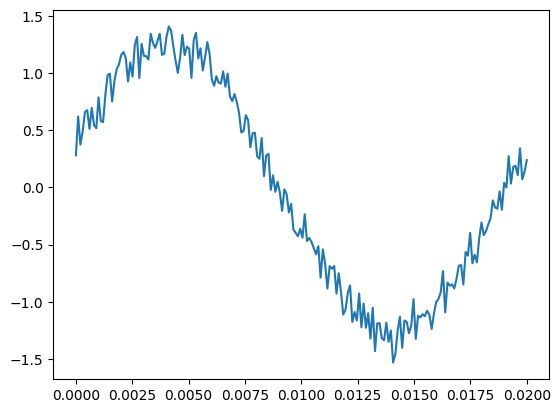

In [5]:
# Zadanie 1 - funkcja

plt.plot(t,y)
plt.xlabel("$t$ [s]")
plt.ylabel("$y$")
plt.title("Funkcja y - zadanie 1")

In [6]:
A = np.ones(n_points)
omega = np.ones(n_points)
phi = np.ones(n_points)
f = []

for t_, A_, omega_, phi_, y_ in zip(t, A, omega, phi, y):
    f.append(A_ * np.sin(omega_ * t_ + phi_) - y_)

f = np.array(f)

In [7]:
D = np.zeros((n_points, 3))


def f_func(A_, omega_, phi_, t_=t, y_=y):
    return A_ * np.sin(omega_ * t_ + phi_) - y_

def phi_func(A_, omega_, phi_, t_=t):
    return A_ * np.sin(omega_ * t_ + phi_)

def get_Df(A_, omega_, phi_, t_=t):
    return np.array([np.sin(omega_ * t_ + phi_), A_ * t_ * np.cos(omega_ * t_ + phi_), A_ * np.cos(omega_ * t_ + phi_)]).transpose()


In [8]:
lambda_ = 1
k = 0
k_max = 35
x = np.array([1, 100 * np.pi, 0])

x_backtrack = [x]
lambda_backtrack = [lambda_]
norm_backtrack = [np.linalg.norm(f_func(*x), ord=2) ** 2]

for _ in range(k_max):
    J = get_Df(*x)
    x_new = x - np.linalg.inv(J.transpose() @ J + lambda_ * np.identity(3)) @ J.transpose() @ f_func(*x)
    if np.linalg.norm(f_func(*x_new), ord=2) < np.linalg.norm(f_func(*x), ord=2):
        lambda_ *= 0.8
        x = x_new
    else:
        lambda_ *= 2

    
    x_backtrack.append(x)
    lambda_backtrack.append(lambda_)
    norm_backtrack.append(np.linalg.norm(f_func(*x), ord=2) ** 2)

x_backtrack = np.array(x_backtrack)
lambda_backtrack = np.array(lambda_backtrack)
norm_backtrack = np.array(norm_backtrack)

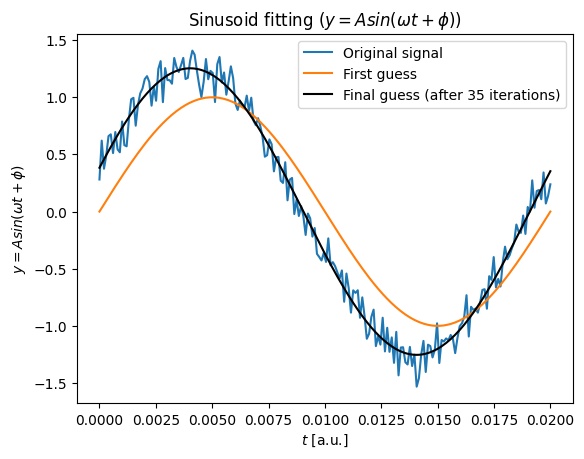

In [9]:
# Zqdanue 1 - wykres

plt.plot(t, y, label='Original signal')
plt.plot(t, phi_func(1, 100 * np.pi, 0), label='First guess')
plt.plot(t, phi_func(*x), c='k', label=f'Final guess (after {k_max} iterations)')


plt.title("Sinusoid fitting ($y = Asin(\omega t + \phi)$)")
plt.xlabel("$t$ [a.u.]")
plt.ylabel("$y = Asin(\omega t + \phi)$")
plt.legend()
plt.show()


Text(0.5, 0, 'iteration number')

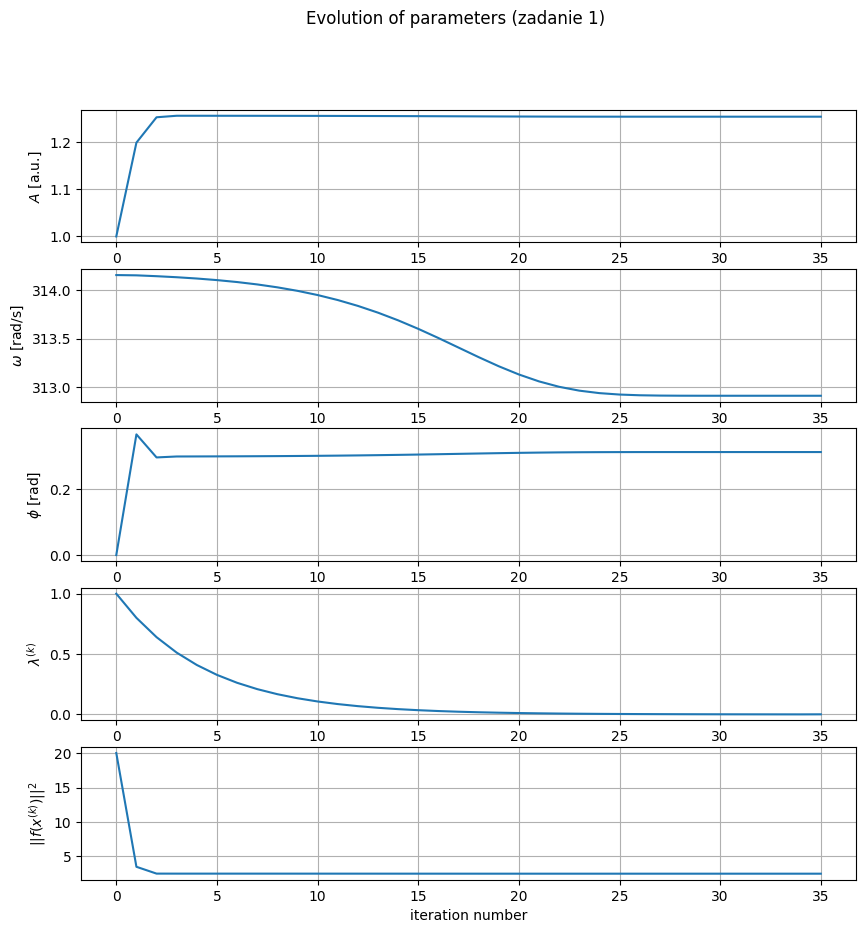

In [10]:
# Zadanie 1 - ewolucja parametrów

fig, ax = plt.subplots(5, 1, figsize=(10,10))
fig.suptitle("Evolution of parameters (zadanie 1)")

ax[0].set_ylabel("$A$ [a.u.]")
ax[1].set_ylabel("$\omega$ [rad/s]")

ax[2].set_ylabel("$\phi$ [rad]")

for i in range(3):
    ax[i].grid()
    ax[i].plot(x_backtrack[:, i])
    
ax[3].grid()
ax[3].plot(lambda_backtrack)
ax[3].set_ylabel("$\lambda^{(k)}$")

ax[4].grid()
ax[4].plot(norm_backtrack)
ax[4].set_ylabel("$||f(x^{(k)})||^2$")
ax[4].set_xlabel("iteration number")

In [11]:
# Zadanie 2

data = loadmat('LM04Data.mat')
t = data['t'].flatten()
y = data['y'].flatten()
n_points = len(y)

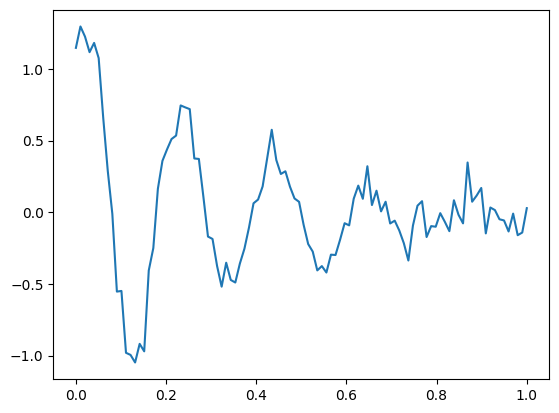

In [12]:
# Zadanie 2 - funkcja

plt.plot(t, y)
plt.xlabel("$t$ [s]")
plt.ylabel("$y$")
plt.title("Funkcja y - zadanie 2")

In [13]:
D = np.zeros((n_points, 3))


def f_func(A_, a_, omega_, phi_, t_=t, y_=y):
    return A_ * np.exp(-a_ * t_) * np.sin(omega_ * t_ + phi_) - y_

def phi_func(A_, a_, omega_, phi_, t_=t):
    return A_ * np.exp(-a_ * t_) * np.sin(omega_ * t_ + phi_)

def get_Df(A_, a_, omega_, phi_, t_=t):
    return np.array([
            np.exp(-a_ * t_) * np.sin(omega_ * t_ + phi_),
            - t_ * A_ * np.exp(-a_ * t_) * np.sin(omega_ * t_ + phi_),
            t_ * A_ * np.exp(-a_ * t_) * np.cos(omega_ * t_ + phi_),
            A_ * np.exp(-a_ * t_) * np.cos(omega_ * t_ + phi_)
        ]).transpose()


In [14]:
lambda_ = 1
k = 0
k_max = 15
x = x_first = np.array([1, 1, 5 * np.pi, 1])

x_backtrack = [x]
lambda_backtrack = [lambda_]
norm_backtrack = [np.linalg.norm(f_func(*x), ord=2) ** 2]

for _ in range(k_max):
    J = get_Df(*x)
    x_new = x - np.linalg.inv(J.transpose() @ J + lambda_ * np.identity(4)) @ J.transpose() @ f_func(*x)
    if np.linalg.norm(f_func(*x_new), ord=2) < np.linalg.norm(f_func(*x), ord=2):
        lambda_ *= 0.8
        x = x_new
    else:
        lambda_ *= 2

    
    x_backtrack.append(x)
    lambda_backtrack.append(lambda_)
    norm_backtrack.append(np.linalg.norm(f_func(*x), ord=2) ** 2)

x_backtrack = np.array(x_backtrack)
lambda_backtrack = np.array(lambda_backtrack)
norm_backtrack = np.array(norm_backtrack)

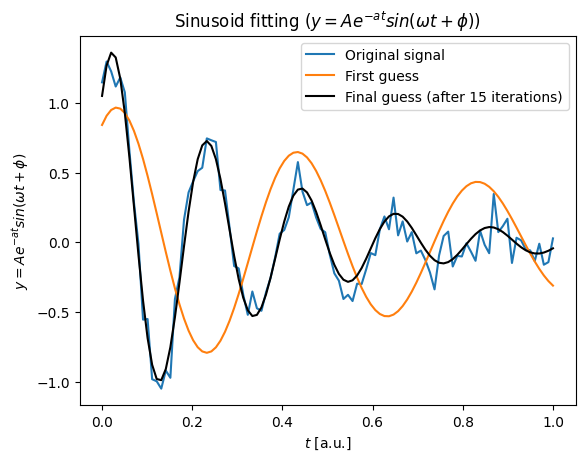

In [15]:
# Zadanie 2 - wykres

plt.plot(t, y, label='Original signal')
plt.plot(t, phi_func(*x_first), label='First guess')
plt.plot(t, phi_func(*x), c='k', label=f'Final guess (after {k_max} iterations)')


plt.title("Sinusoid fitting ($y = Ae^{-at}sin(\omega t + \phi)$)")
plt.xlabel("$t$ [a.u.]")
plt.ylabel("$y = Ae^{-at}sin(\omega t + \phi)$")
plt.legend()
plt.show()

In [16]:
# Zadanie 2 - odpowiedz

x

array([ 1.46471628,  3.00262365, 29.99208109,  0.79864267])

Text(0.5, 0, 'iteration number')

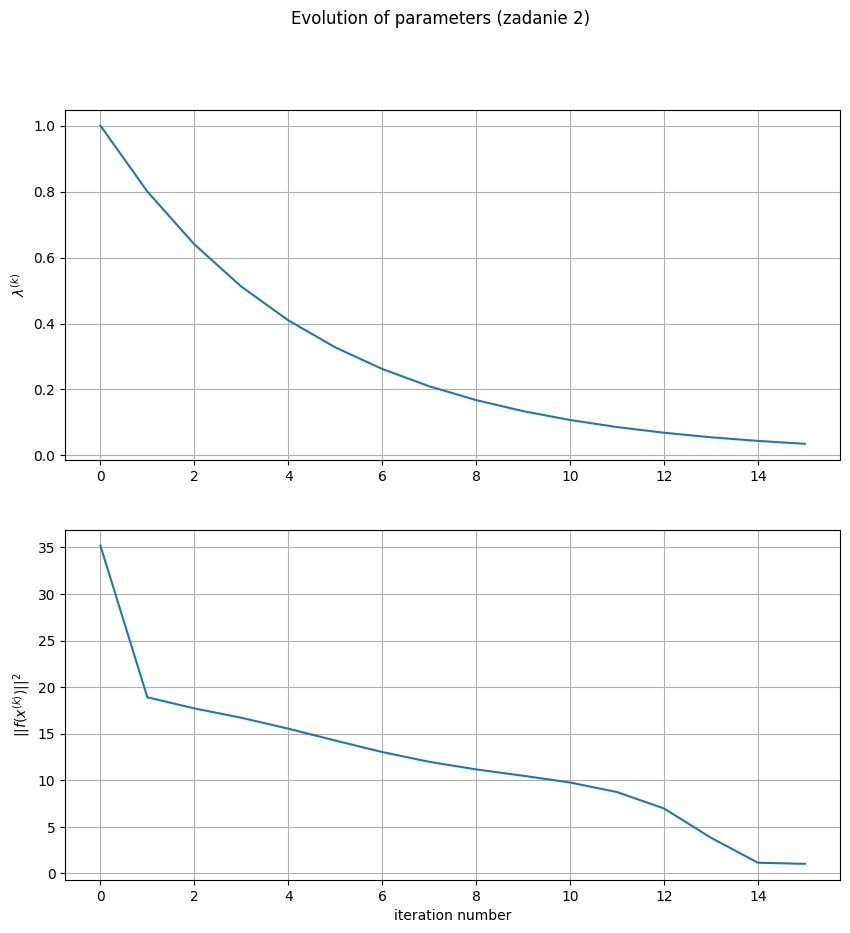

In [17]:
# Zadanie 2 - ewolucja parametrów

fig, ax = plt.subplots(2, 1, figsize=(10,10))
fig.suptitle("Evolution of parameters (zadanie 2)")
ax[0].grid()
ax[0].plot(lambda_backtrack)
ax[0].set_ylabel("$\lambda^{(k)}$")

ax[1].grid()
ax[1].plot(norm_backtrack)
ax[1].set_ylabel("$||f(x^{(k)})||^2$")
ax[1].set_xlabel("iteration number")

In [19]:
# Zadanie 3

data = loadmat('inertialData.mat')
t = data['t'].flatten()
y = data['y'].flatten()
n_points = len(y)

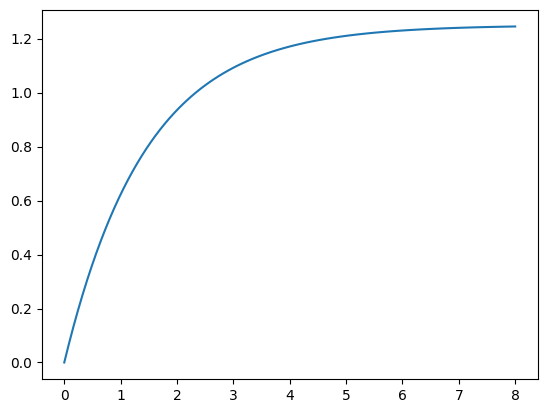

In [20]:
# Zaanie 3 - funkcja

plt.plot(t, y)
plt.xlabel("$t$ [s]")
plt.ylabel("$h$")
plt.title("Funkcja h - zadanie 3")

In [21]:
D = np.zeros((n_points, 3))


def f_func(k_, T_, t_=t, y_=y):
    return k_ * (1 - np.exp(-t_ / T_)) - y_

def phi_func(k_, T_, t_=t):
    return k_ * (1 - np.exp(-t_ / T_))


def get_Df(k_, T_, t_=t):
    return np.array([
                1- np.exp(-t_/T_),
                -k_/(T_ * T_) * np.exp(-t_/T_)
        ]).transpose()


In [22]:
lambda_ = 1
k = 0
k_max = 15
x = x_first = np.array([1, 1])

x_backtrack = [x]
lambda_backtrack = [lambda_]
norm_backtrack = [np.linalg.norm(f_func(*x), ord=2) ** 2]

for _ in range(k_max):
    J = get_Df(*x)
    x_new = x - np.linalg.inv(J.transpose() @ J + lambda_ * np.identity(2)) @ J.transpose() @ f_func(*x)
    if np.linalg.norm(f_func(*x_new), ord=2) < np.linalg.norm(f_func(*x), ord=2):
        lambda_ *= 0.8
        x = x_new
    else:
        lambda_ *= 2

    
    x_backtrack.append(x)
    lambda_backtrack.append(lambda_)
    norm_backtrack.append(np.linalg.norm(f_func(*x), ord=2) ** 2)

x_backtrack = np.array(x_backtrack)
lambda_backtrack = np.array(lambda_backtrack)
norm_backtrack = np.array(norm_backtrack)

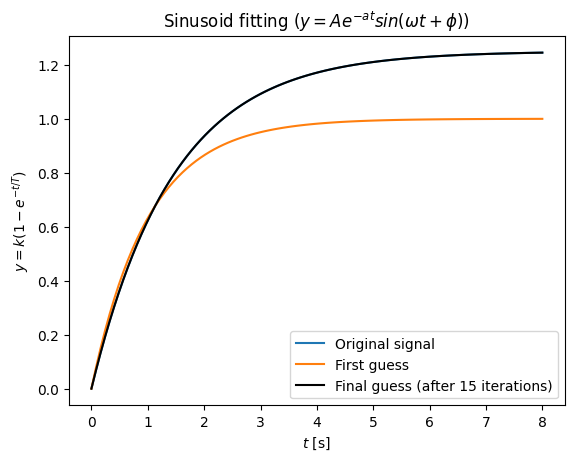

In [26]:
# Zadanie 3 - wykres

plt.plot(t, y, label='Original signal')
plt.plot(t, phi_func(*x_first), label='First guess')
plt.plot(t, phi_func(*x), c='k', label=f'Final guess (after {k_max} iterations)')


plt.title("Sinusoid fitting ($h = k(1-e^{-t/T})$)")
plt.xlabel("$t$ [s]")
plt.ylabel("$h = k(1-e^{-t/T})$")
plt.legend()
plt.show()

Text(0.5, 0, 'iteration number')

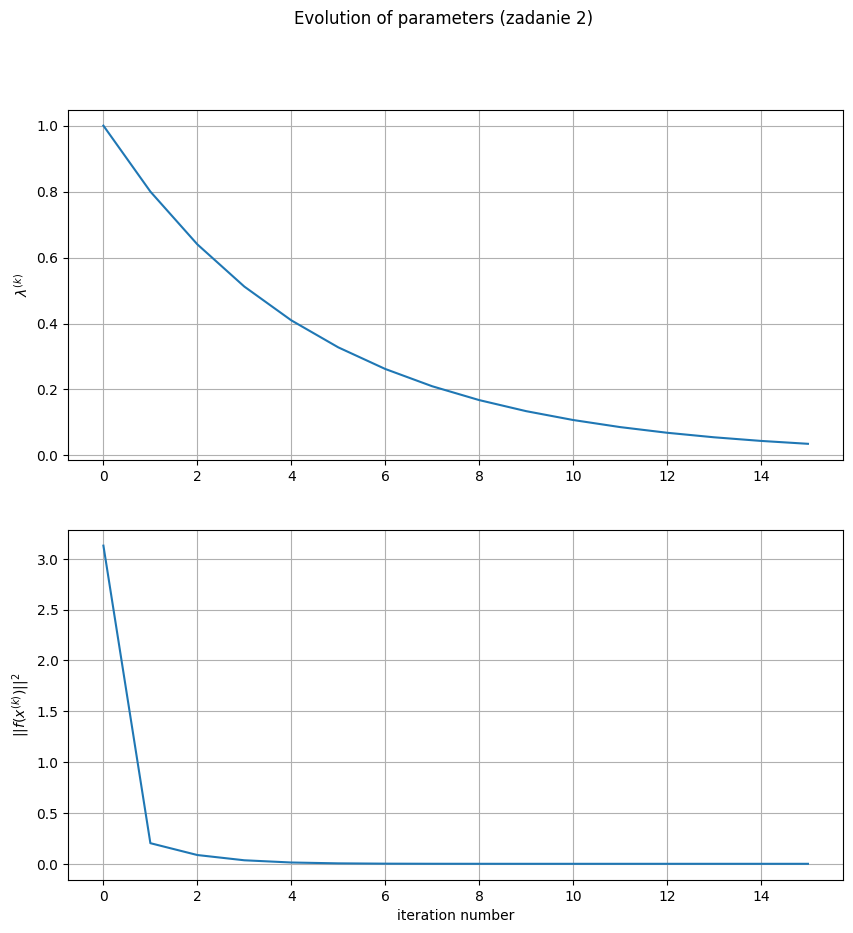

In [24]:
# Zadanie 3 - ewolucja parametrów

fig, ax = plt.subplots(2, 1, figsize=(10,10))
fig.suptitle("Evolution of parameters (zadanie 3)")
ax[0].grid()
ax[0].plot(lambda_backtrack)
ax[0].set_ylabel("$\lambda^{(k)}$")

ax[1].grid()
ax[1].plot(norm_backtrack)
ax[1].set_ylabel("$||f(x^{(k)})||^2$")
ax[1].set_xlabel("iteration number")

In [25]:
# Zadanie 3 - odpowiedz
x

array([1.24998129, 1.4499197 ])

In [27]:
# Zadanie 4

data = loadmat('twoInertialData.mat')
t = data['t'].flatten()
y = data['y'].flatten()
n_points = len(y)

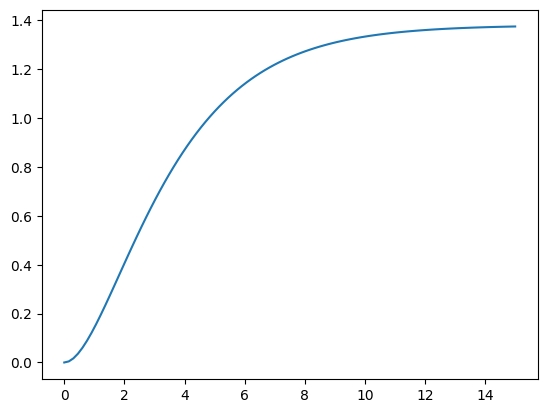

In [28]:
# Zadanie 4 - funkcja

plt.plot(t, y)
plt.xlabel("$t$ [s]")
plt.ylabel("$h$")
plt.title("Funkcja h - zadanie 4")

In [44]:
D = np.zeros((n_points, 3))


def f_func(k_, T1_, T2_, t_=t, y_=y):
    return k_ * (1 - (T1_ * np.exp(-t_ / T1_) - T2_ * np.exp(- t_ / T2_)) / (T1_ - T2_)) - y_

def phi_func(k_, T1_, T2_, t_=t):
    return k_ * (1 - (T1_ * np.exp(-t_ / T1_) - T2_ * np.exp(- t_ / T2_)) / (T1_ - T2_))


def get_Df(k_, T1_, T2_, t_=t):
    return np.array([
                1 - 1/(T1_ - T2_ ) * (T1_ * np.exp(-t_/T1_) - T2_ * np.exp(-t_/T2_)),
                k_/(T2_ - T1_) * (t_/T1_ * np.exp(-t_/T1_) + T2_/(T1_ - T2_) * (np.exp(-t_/T2_) - np.exp(-t_/T1_))),
                k_/(T1_ - T2_) * (t_/T2_ * np.exp(-t_/T2_) + T1_/(T2_ - T1_) * (np.exp(-t_/T1_) - np.exp(-t_/T2_))),
        ]).transpose()


In [47]:
lambda_ = 1
k = 0
k_max = 15
x = x_first = np.array([1, 2, 1])

x_backtrack = [x]
lambda_backtrack = [lambda_]
norm_backtrack = [np.linalg.norm(f_func(*x), ord=2) ** 2]

for _ in range(k_max):
    J = get_Df(*x)
    x_new = x - np.linalg.inv(J.transpose() @ J + lambda_ * np.identity(3)) @ J.transpose() @ f_func(*x)
    if np.linalg.norm(f_func(*x_new), ord=2) < np.linalg.norm(f_func(*x), ord=2):
        lambda_ *= 0.8
        x = x_new
    else:
        lambda_ *= 2

    
    x_backtrack.append(x)
    lambda_backtrack.append(lambda_)
    norm_backtrack.append(np.linalg.norm(f_func(*x), ord=2) ** 2)

x_backtrack = np.array(x_backtrack)
lambda_backtrack = np.array(lambda_backtrack)
norm_backtrack = np.array(norm_backtrack)

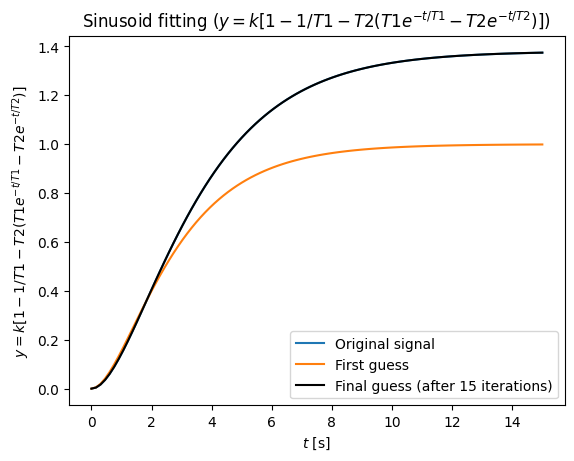

In [51]:
# Zadanie 4 - wykres

plt.plot(t, y, label='Original signal')
plt.plot(t, phi_func(*x_first), label='First guess')
plt.plot(t, phi_func(*x), c='k', label=f'Final guess (after {k_max} iterations)')


plt.title("Sinusoid fitting ($h = k[1-1/(T1-T2)(T1e^{-t/T1} - T2e^{-t/T2})]$)")
plt.xlabel("$t$ [s]")
plt.ylabel("$h = k[1-1/(T1-T2)(T1e^{-t/T1} - T2e^{-t/T2})]$")
plt.legend()
plt.show()

In [49]:
# Zadanie 4 - odpowiedz

x

array([1.38028722, 2.33255204, 1.43976653])

Text(0.5, 0, 'iteration number')

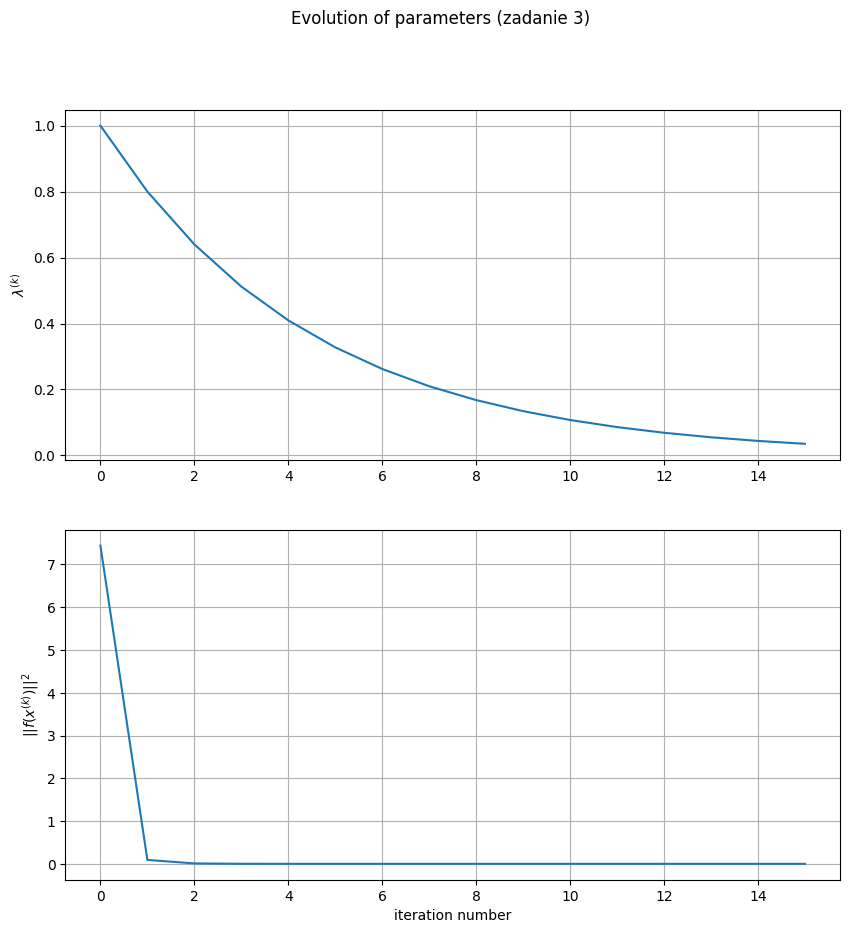

In [50]:
# Zadanie 4 - ewolucja parametrów

fig, ax = plt.subplots(2, 1, figsize=(10,10))
fig.suptitle("Evolution of parameters (zadanie 4)")
ax[0].grid()
ax[0].plot(lambda_backtrack)
ax[0].set_ylabel("$\lambda^{(k)}$")

ax[1].grid()
ax[1].plot(norm_backtrack)
ax[1].set_ylabel("$||f(x^{(k)})||^2$")
ax[1].set_xlabel("iteration number")

In [52]:
# Zadanie 5

data = loadmat('reductionData.mat')
t = data['t'].flatten()
y = data['y'].flatten()
n_points = len(y)

Text(0.5, 1.0, 'Funkcja h - zadanie 4')

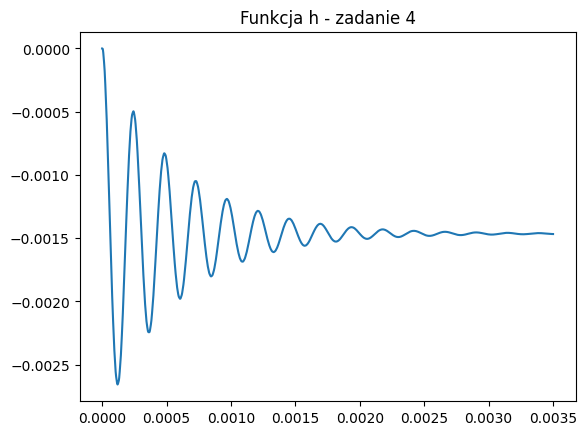

In [53]:
# Zadanue 5 - funkcja

plt.plot(t, y)
plt.xlabel("$t$ [s]")
plt.ylabel("$h$")
plt.title("Funkcja h - zadanie 4")

In [70]:
D = np.zeros((n_points, 3))


def f_func(k_, gamma_, beta_, t_=t, y_=y):
    return k_ * (1 - np.exp(-gamma_ * t_) * (np.cos(beta_ * t_) + (gamma_ / beta_) * np.sin(beta_ * t_))) - y_

def phi_func(k_, gamma_, beta_, t_=t):
    return k_ * (1 - np.exp(-gamma_ * t_) * (np.cos(beta_ * t_) + (gamma_ / beta_) * np.sin(beta_ * t_)))


def get_Df(k_, gamma_, beta_, t_=t):
    return np.array([
                1 - np.exp(-gamma_ * t_) * (np.cos(beta_ * t_) + gamma_/beta_ * np.sin(beta_ * t_)),
                k_ * np.exp(-gamma_ * t_) * (t_ * np.cos(beta_ * t_) - ((1 - t_ * gamma_)/beta_) * np.sin(beta_ * t_)),
                k_ * np.exp(-gamma_ * t_) * ((t_ + gamma_ / (beta_ * beta_)) * np.sin(beta_ * t_) - (gamma_ / beta_) * t_ * np.cos(beta_ * t_))
        ]).transpose()


In [96]:
lambda_ = 1
k = 0
k_max = 165
x = x_first = np.array([1, 1, 1])

x_backtrack = [x]
lambda_backtrack = [lambda_]
norm_backtrack = [np.linalg.norm(f_func(*x), ord=2) ** 2]

for _ in range(k_max):
    J = get_Df(*x)
    x_new = x - np.linalg.inv(J.transpose() @ J + lambda_ * np.identity(3)) @ J.transpose() @ f_func(*x)
    if np.linalg.norm(f_func(*x_new), ord=2) < np.linalg.norm(f_func(*x), ord=2):
        lambda_ *= 0.8
        x = x_new
    else:
        lambda_ *= 2

    
    x_backtrack.append(x)
    lambda_backtrack.append(lambda_)
    norm_backtrack.append(np.linalg.norm(f_func(*x), ord=2) ** 2)

x_backtrack = np.array(x_backtrack)
lambda_backtrack = np.array(lambda_backtrack)
norm_backtrack = np.array(norm_backtrack)

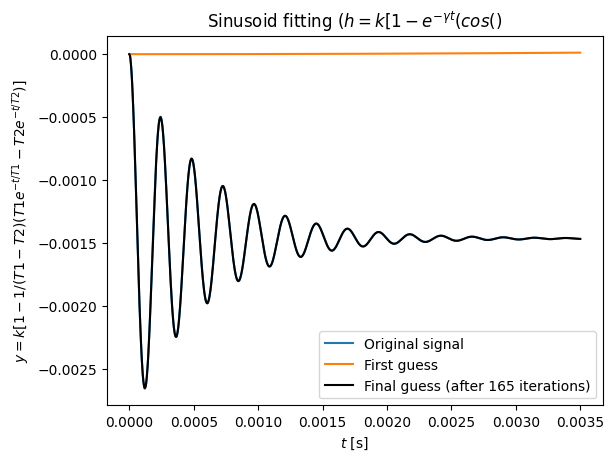

In [97]:
# Zadanie 5 - wykres

plt.plot(t, y, label='Original signal')
plt.plot(t, phi_func(*x_first), label='First guess')
plt.plot(t, phi_func(*x), c='k', label=f'Final guess (after {k_max} iterations)')


plt.title("Sinusoid fitting ($h = k[1-e^{-\gamma t}(cos(\beta t) + \gamma \ \beta sin(\beta t))$)")
plt.xlabel("$t$ [s]")
plt.ylabel("$h = k[1-e^{-\gamma t}(cos(\beta t) + \gamma \ \beta sin(\beta t))$")
plt.legend()
plt.show()

In [98]:
# Zadanie 5 - odpowiedz

x

array([-1.46385258e-03,  1.73025640e+03,  2.59807072e+04])

Text(0.5, 0, 'iteration number')

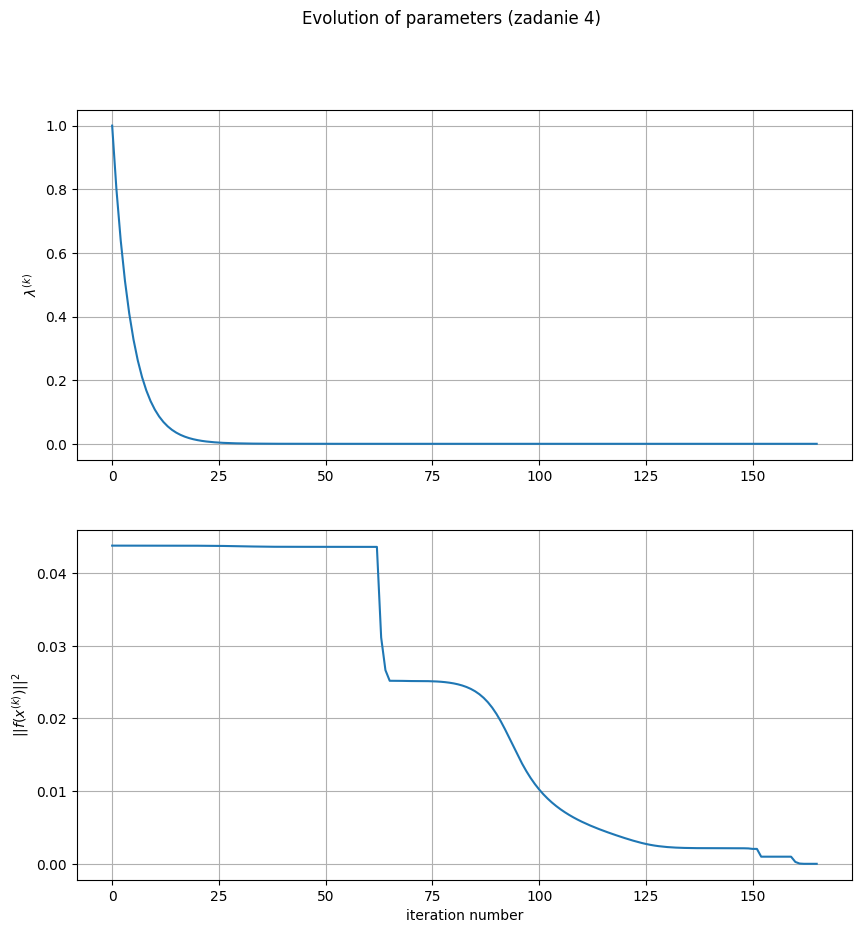

In [99]:
# Zadanie 5 - ewolucja parametrów

fig, ax = plt.subplots(2, 1, figsize=(10,10))
fig.suptitle("Evolution of parameters (zadanie 5)")
ax[0].grid()
ax[0].plot(lambda_backtrack)
ax[0].set_ylabel("$\lambda^{(k)}$")

ax[1].grid()
ax[1].plot(norm_backtrack)
ax[1].set_ylabel("$||f(x^{(k)})||^2$")
ax[1].set_xlabel("iteration number")

In [100]:
from scipy.optimize import curve_fit

In [102]:
def phi_func(t_, k_, gamma_, beta_):
    return k_ * (1 - np.exp(-gamma_ * t_) * (np.cos(beta_ * t_) + (gamma_ / beta_) * np.sin(beta_ * t_)))

curve_fit(phi_func, t, y)[0]

array([ 0.00069223, -0.00140711,  0.0007111 ])

In [103]:
x

array([-1.46385258e-03,  1.73025640e+03,  2.59807072e+04])

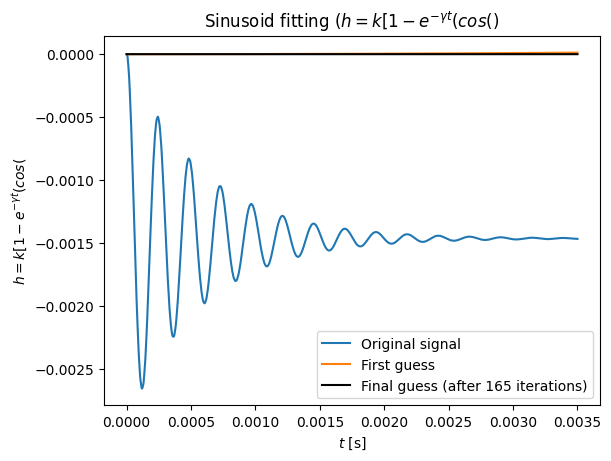

In [106]:
plt.plot(t, y, label='Original signal')
plt.plot(t, phi_func(t, *x_first), label='First guess')
plt.plot(t, phi_func(t, *curve_fit(phi_func, t, y)[0]), c='k', label=f'Final guess (after {k_max} iterations)')


plt.title("Sinusoid fitting ($h = k[1-e^{-\gamma t}(cos(\beta t) + \gamma \ \beta sin(\beta t))$)")
plt.xlabel("$t$ [s]")
plt.ylabel("$h = k[1-e^{-\gamma t}(cos(\beta t) + \gamma \ \beta sin(\beta t))$")
plt.legend()
plt.show()